In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
np.random.seed(42) 
X = 2 * np.random.rand(100, 1)
y = 3 * X + 9 + np.random.randn(100, 1)

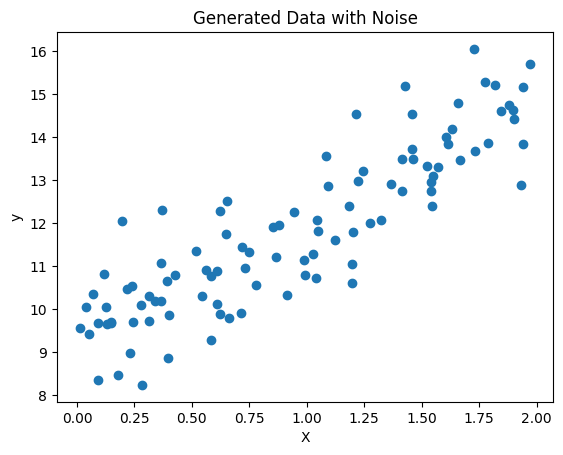

In [12]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data with Noise')
plt.show()

In [13]:
def batch_gradient_descent(X, y, learning_rate=0.1, n_iterations=1000):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]  
    theta = np.random.randn(2, 1)  
    
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta -= learning_rate * gradients
    
    return theta

In [14]:
def mini_batch_gradient_descent(X, y, learning_rate=0.1, n_iterations=50, batch_size=20):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]  
    theta = np.random.randn(2, 1)  
    
    for epoch in range(n_iterations):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, m, batch_size):
            xi = X_b_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = 2/len(xi) * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients
    
    return theta


In [15]:
def stochastic_gradient_descent(X, y, learning_rate=0.1, n_iterations=50):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]  
    theta = np.random.randn(2, 1)  
    
    for epoch in range(n_iterations):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients
    
    return theta

In [19]:
def newtons_method(X, y, n_iterations=50):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]  
    theta = np.random.randn(2, 1)  
    
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        hessian = 2/m * X_b.T.dot(X_b)
        theta -= np.linalg.inv(hessian).dot(gradients)
    
    return theta

In [20]:
batch_theta = batch_gradient_descent(X, y)
print(f"Parameters learned with Batch Gradient Descent: {batch_theta.ravel()}")

stochastic_theta = stochastic_gradient_descent(X, y)
print(f"Parameters learned with Stochastic Gradient Descent: {stochastic_theta.ravel()}")

mini_batch_theta = mini_batch_gradient_descent(X, y)
print(f"Parameters learned with Mini-batch Gradient Descent: {mini_batch_theta.ravel()}")

newtons_theta = newtons_method(X, y)
print(f"Parameters learned with Newton's Method: {newtons_theta.ravel()}")

Parameters learned with Batch Gradient Descent: [9.21509616 2.77011339]
Parameters learned with Stochastic Gradient Descent: [8.5145337  3.17168446]
Parameters learned with Mini-batch Gradient Descent: [9.21215381 2.76801805]
Parameters learned with Newton's Method: [9.21509616 2.77011339]


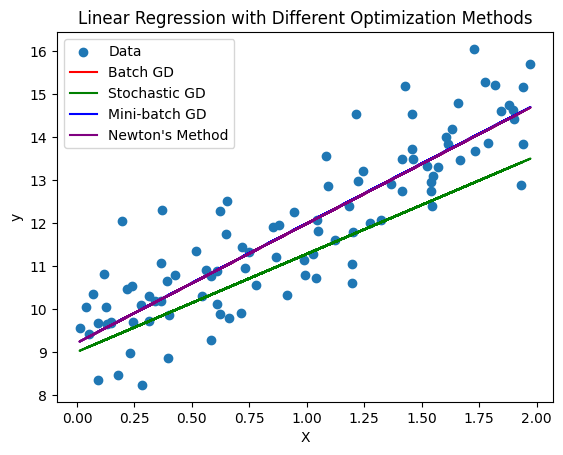

In [18]:
plt.scatter(X, y, label='Data')
plt.plot(X, X * batch_theta[1] + batch_theta[0], color='red', label='Batch GD')
plt.plot(X, X * stochastic_theta[1] + stochastic_theta[0], color='green', label='Stochastic GD')
plt.plot(X, X * mini_batch_theta[1] + mini_batch_theta[0], color='blue', label='Mini-batch GD')
plt.plot(X, X * newtons_theta[1] + newtons_theta[0], color='purple', label="Newton's Method")
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Different Optimization Methods')
plt.legend()
plt.show()